# Decision Tree Regressor Model for Predicting Charges from Insurance Dataset

## Libraries
#### pandas
For data manipulation and analysis.
#### OneHotEncoder
Encodes categorical variables into binary format.
#### train_test_split
Splits data into training and testing sets.
#### DecisionTreeRegressor
Implements decision tree regression for predictive modeling.
#### mean_squared_error, mean_absolute_error, r2_score
Metrics to evaluate model performance.
#### matplotlib.pyplot
For creating visualizations and plots.
#### GridSearchCV
Performs hyperparameter tuning using grid search with cross-validation.

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

## Load the dataset

In [4]:
df = pd.read_csv('../dataset/insurance.csv')

## Drop duplicate rows

In [5]:
df = df.drop_duplicates()

## Apply One Hot Encode

In [6]:
# Apply OneHotEncoder to the 'smoker' and 'region' column
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[['smoker', 'region', 'sex']])

# Add the encoded column(s) back to the DataFrame
encoded_columns = encoder.get_feature_names_out(['smoker', 'region', 'sex'])
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)
df = pd.concat([df.drop(columns=['smoker', 'region', 'sex']), df_encoded], axis=1)

## Split data into train and test

In [7]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

# Perform train-test split with stratification based on the 'charges' column
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=4)  # Stratify into quartiles
)

## Decision Tree Regressor Model creation and prediction

In [8]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Evaluate Train and Test Performance

### Model Evaluation Metrics

In [9]:
# Predictions for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for train set
train_rmse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_rmse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Train RMSE: 0.00
Test RMSE: 34204167.43
Train MAE: 0.00
Test MAE: 2708.33
Train R2: 1.0000
Test R2: 0.7624


### Scatter plot for train set

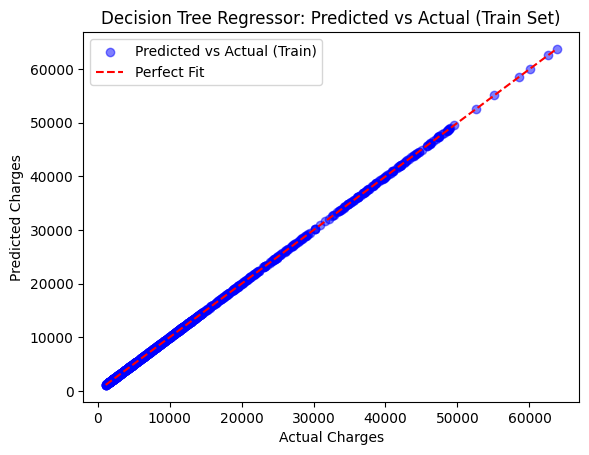

In [10]:
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Predicted vs Actual (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Decision Tree Regressor: Predicted vs Actual (Train Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

### Scatter plot for test set

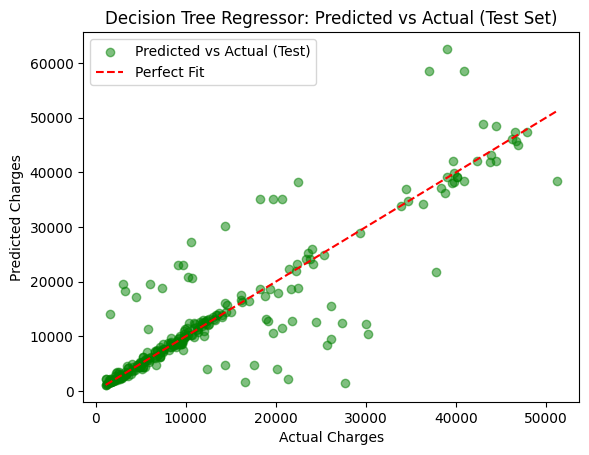

In [11]:
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Predicted vs Actual (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Decision Tree Regressor: Predicted vs Actual (Test Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

## Tuning Decision Tree Regressor with max_depth and min_samples_leaf

### Finding the Optimal max_depth and min_samples_leaf

In [12]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the regressor
dt = DecisionTreeRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_) ** 0.5)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 10}
Best RMSE: 4646.170553995127


### Retrain with best parameters

In [13]:
# Initialize the Decision Tree Regressor
best_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

# Train the model
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

### Evaluate Train and Test Performance

In [14]:
# Predictions for train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics for train set
train_rmse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_rmse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Train RMSE: 17551695.75
Test RMSE: 22442027.55
Train MAE: 2351.55
Test MAE: 2749.09
Train R2: 0.8808
Test R2: 0.8441


### Scatter plot for train set

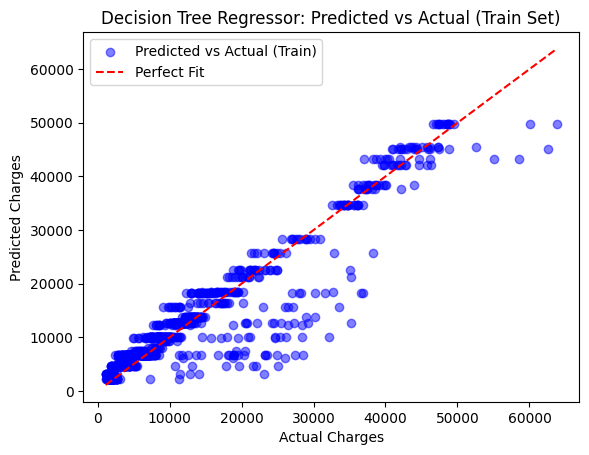

In [15]:
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Predicted vs Actual (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Decision Tree Regressor: Predicted vs Actual (Train Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

### Scatter plot for test set

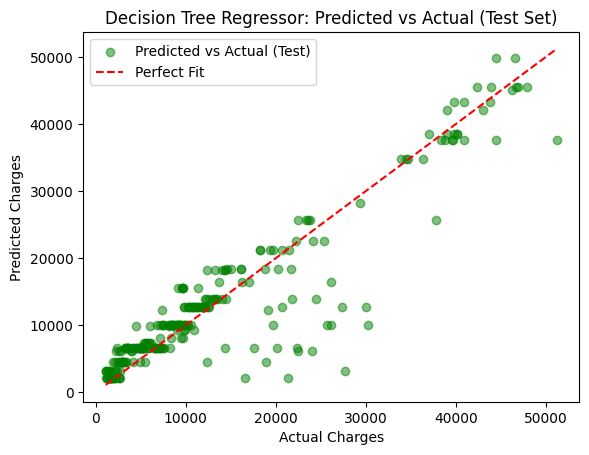

In [16]:
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Predicted vs Actual (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Decision Tree Regressor: Predicted vs Actual (Test Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()